In [1]:
import pandas as pd#import all of the related python libraries to be able to deal with the data 
import numpy as np
import glob
import sklearn.preprocessing
import struct
import ctypes
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [6]:
# get the names of the files in the directory
print(glob.glob("D:\School\Fifth Year\Large Scale Data Analytics\Project\ieee-fraud-detection\*"))

[&#39;D:\\School\\Fifth Year\\Large Scale Data Analytics\\Project\\ieee-fraud-detection\\sample_submission.csv&#39;, &#39;D:\\School\\Fifth Year\\Large Scale Data Analytics\\Project\\ieee-fraud-detection\\test_identity.csv&#39;, &#39;D:\\School\\Fifth Year\\Large Scale Data Analytics\\Project\\ieee-fraud-detection\\test_transaction.csv&#39;, &#39;D:\\School\\Fifth Year\\Large Scale Data Analytics\\Project\\ieee-fraud-detection\\train_identity.csv&#39;, &#39;D:\\School\\Fifth Year\\Large Scale Data Analytics\\Project\\ieee-fraud-detection\\train_transaction.csv&#39;]


This makes it so we can imput the data and have it stored 

In [2]:
#Include the data as a csv for the training identity and test to see if it is inluded properly
train_identity=pd.read_csv("D:\School\Fifth Year\Large Scale Data Analytics\Project\ieee-fraud-detection\\train_identity.csv")
#Create a Data frame to collect and summarise the data 
tr_IDdf=pd.DataFrame(train_identity)

#include the test identity files 
test_identity=pd.read_csv("D:\School\Fifth Year\Large Scale Data Analytics\Project\ieee-fraud-detection\\test_identity.csv")
#Create a Data frame to summarize info  
te_IDdf=pd.DataFrame(test_identity)

#Get the training transaction info 
train_transaction=pd.read_csv("D:\School\Fifth Year\Large Scale Data Analytics\Project\ieee-fraud-detection\\train_transaction.csv")
#Create a Data frame to summarize info 
tr_TR_df=pd.DataFrame(train_transaction)

#Get the testing transaction data 
test_transaction=pd.read_csv("D:\School\Fifth Year\Large Scale Data Analytics\Project\ieee-fraud-detection\\test_transaction.csv")
#Create a Data frame to summarize info 
te_TR_df=pd.DataFrame(test_transaction)

We will be using this next section to view the information about each data frame 

In [8]:
print("Training Identity Data\n\n")#print the data frame info for the identity 
print(tr_IDdf.info())
print("\n\nTraining Transaction Data\n\n")#print the training transaction data frame information 
print(tr_TR_df.info())


Training Identity Data


&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
TransactionID    144233 non-null int64
id_01            144233 non-null float64
id_02            140872 non-null float64
id_03            66324 non-null float64
id_04            66324 non-null float64
id_05            136865 non-null float64
id_06            136865 non-null float64
id_07            5155 non-null float64
id_08            5155 non-null float64
id_09            74926 non-null float64
id_10            74926 non-null float64
id_11            140978 non-null float64
id_12            144233 non-null object
id_13            127320 non-null float64
id_14            80044 non-null float64
id_15            140985 non-null object
id_16            129340 non-null object
id_17            139369 non-null float64
id_18            45113 non-null float64
id_19            139318 non-null float64
id_20            139261 non-null float64
id_2

For this section we will be looking to find the amount of missing data for the training identity set 

In [9]:
missing_ident=train_identity.isnull().sum()
missing_ident_sorted=(missing_ident.sort_values(ascending=False))
print('{:15s} {:15s} {:15s} {:15s}'.format("Col Name","# Missing", "% Missing","Data Type"))#print out the columns used 
for y in range(missing_ident.size):#go through each of the columns and get the name, amount missing and the data type and calulate the total amount of the data that is missing 
    print('{:15s} {:15s} {:15s} {:15s}'.format(missing_ident_sorted.index[y],str(tr_IDdf[missing_ident_sorted.index[y]].isnull().sum()),str(round(missing_ident_sorted.data[y]/train_identity.shape[0]*100)),str(tr_IDdf[missing_ident_sorted.index[y]].dtypes)))

Col Name        # Missing       % Missing       Data Type      
id_24           139486          97              float64        
id_25           139101          96              float64        
id_07           139078          96              float64        
id_08           139078          96              float64        
id_21           139074          96              float64        
id_26           139070          96              float64        
id_22           139064          96              float64        
id_27           139064          96              object         
id_23           139064          96              object         
id_18           99120           69              float64        
id_04           77909           54              float64        
id_03           77909           54              float64        
id_33           70944           49              object         
id_10           69307           48              float64        
id_09           69307           48      

For this section we will be looking for the missing data in the Transaction data 

In [10]:
missing_trans=train_transaction.isnull().sum()
missing_trans_sorted=(missing_trans.sort_values(ascending=False))
print('{:15s} {:15s} {:15s} {:15s}'.format("Col Name","# Missing", "% Missing","Data Type"))#print out the columns used 
for z in range(missing_trans.size):#go through each of the columns and get the name, amount missing and the data type and calulate the total amount of the data that is missing 
    print('{:15s} {:15s} {:15s} {:15s}'.format(missing_trans_sorted.index[z],str(tr_TR_df[missing_trans_sorted.index[z]].isnull().sum()),str(round(missing_trans_sorted.data[z]/train_transaction.shape[0]*100)),str(tr_TR_df[missing_trans_sorted.index[z]].dtypes)))

78              float64        
V260            460110          78              float64        
V218            460110          78              float64        
V273            460110          78              float64        
V275            460110          78              float64        
V276            460110          78              float64        
V269            460110          78              float64        
V277            460110          78              float64        
V268            460110          78              float64        
V267            460110          78              float64        
V266            460110          78              float64        
V265            460110          78              float64        
V264            460110          78              float64        
V278            460110          78              float64        
V263            460110          78              float64        
V262            460110          78              float64        
V261    

In this next section we will attempt to combine the two data sets based on the transaction ID to get the full information combined we will do this for just the training at the moment

In [3]:
train_combined=pd.merge(train_identity,train_transaction,on='TransactionID')#combines the two data frames based on the same Transaction ID
train_combinedDF=pd.DataFrame(train_combined)#Convert to a data frame for better information 
print(train_combinedDF.info())#print out the data frame infomation 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144233 entries, 0 to 144232
Columns: 434 entries, TransactionID to V339
dtypes: float64(399), int64(4), object(31)
memory usage: 478.7+ MB
None


In this next section we will work on starting to look at the data and how much we are missing which is the first step of cleaning the data

At the end of this section we will print out our total list of columns in the combined data with the percentage of missing data and the data types the columns are sorted by the most missing to the least 

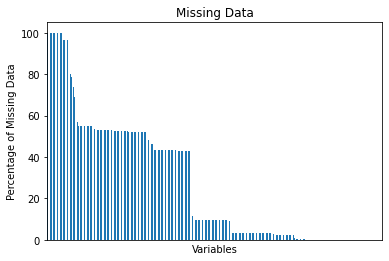

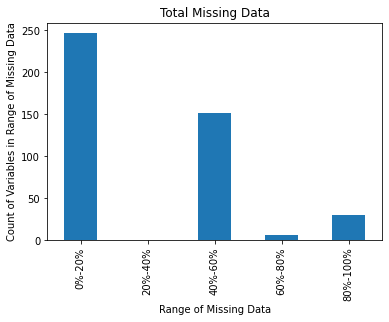

In [119]:
#the purpose of this function is to visualize how much data is missing
#it only takes one input which is the data to be looked at 
#it will output two graphs one that shows all variables and the percentage missing and the other that counts how many variables have missing variables in a range of 0-100 incremented by 20
def GraphMissing(missing_data):
    percent_missing=missing_data.isnull().sum()#Calculate the percentage missing to the closest percentage
    missing_sorted=(percent_missing.sort_values(ascending=False))#Sort the data based on the values of missing data in decreasing order 
    missing_sorted=(missing_sorted/len(missing_data))*100#get the percentages of missing data 
    ticks=[]
    plt.figure()#set the figure to be plotted 
    total_missing=missing_sorted.plot(kind="bar", title="Missing Data",xlabel="Variables",ylabel="Percentage of Missing Data",subplots=False,xticks=ticks)#plot the bar graph 
    totfig=total_missing.get_figure()
    totfig.savefig("..\Plots\Total_Missing.png")#save the figure to the plots file 
    a=0#set a starting range 
    index=[]#set the arrays to be initially empty 
    data=[]
    while(a<100):#go until a is above 100
        text="{}%-{}%".format(a,a+20)#format text to have the increments we are interested in 
        data.append(text)#save the names to the arrat
        mis=missing_sorted.between(a, a+20)#get the true-false variables if the number is in the range 
        mis=missing_sorted[mis==True]#only select the true values 
        index.append(mis.size)#add the amount of variables with missing values  
        a=a+20#increment a 

    data=np.array(data)#create a np array to be used 
    #sumdat=sum(index)#uncomment if you want the values to be normalized 
    #newdat[:]=[(x / sumdat)*100 for x in index]
    mis_series=pd.Series(index,index=data)#create a series with the data 
    plt.figure()
    range_plot=mis_series.plot.bar(title="Total Missing Data",xlabel="Range of Missing Data",ylabel="Count of Variables in Range of Missing Data",subplots=False)#plot the second bar graph 
    fig=range_plot.get_figure()
    fig.savefig("..\Plots\Missing_Data_Per_Range.png")#save the graph to the 

GraphMissing(train_combined)

At this point we can start looking at how each variable affects the outcome of the test. This is called feature selection and we can use a few different methods to try and get our most important variables 

For the first part we will be seperating the data into two groups one being if there was any fraud or not for the answer and the other being the remaining columns. We seperate them so we can have suprovised learning with the two sets and unsupervised with the non answer set. 

In [13]:
ans=train_combined['isFraud']#make ans the column with the answers in it 
dat=train_combined.drop(columns=('isFraud'))# the data without the answer is seperated into the dat data type

Once we have our seperated data we can start to perform the selection process with feature importance which gives a score based on how relevent the data is 

In [4]:
#to use chi squared we have to convert the categorical data into something we can use such as 
enc=LabelEncoder()# create the label encoder
for cols in dat:#loop through all of the columns
    if dat[cols].dtype.name=="object":#if the data is in a string format we will need to convert it to numeric to find the correlation 
        enc.fit(dat[cols].astype(str))#fit the column to the encoder to convert to numeric 
        dat[cols]=enc.fit_transform(dat[cols].astype(str))#transform the data into numeric 
       

NameError: name 'dat' is not defined

for this part we use the built in correlation function to see the corelation between the variables 

<Figure size 1368x1080 with 0 Axes>

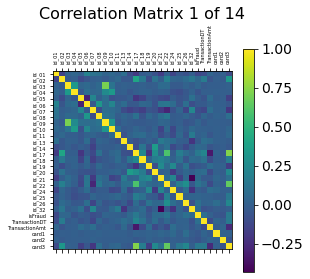

<Figure size 1368x1080 with 0 Axes>

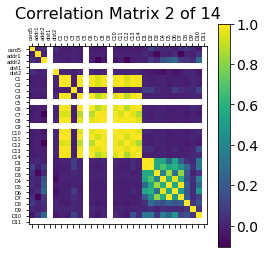

<Figure size 1368x1080 with 0 Axes>

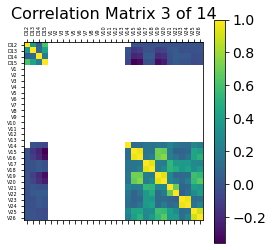

<Figure size 1368x1080 with 0 Axes>

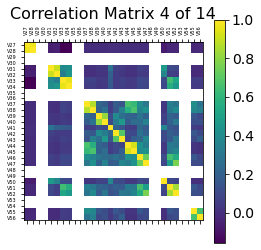

<Figure size 1368x1080 with 0 Axes>

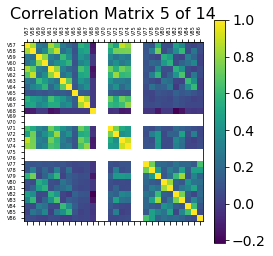

<Figure size 1368x1080 with 0 Axes>

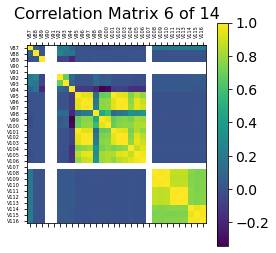

<Figure size 1368x1080 with 0 Axes>

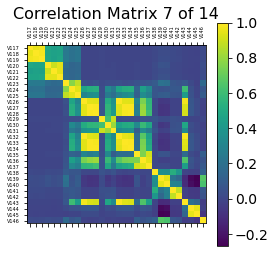

<Figure size 1368x1080 with 0 Axes>

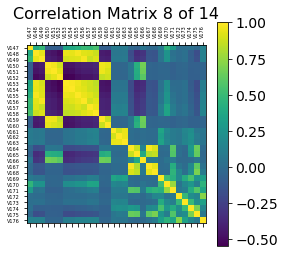

<Figure size 1368x1080 with 0 Axes>

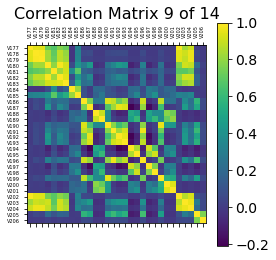

<Figure size 1368x1080 with 0 Axes>

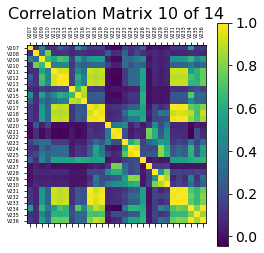

<Figure size 1368x1080 with 0 Axes>

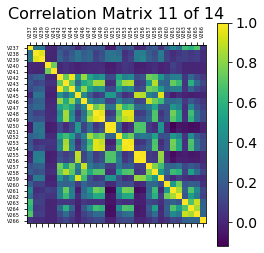

<Figure size 1368x1080 with 0 Axes>

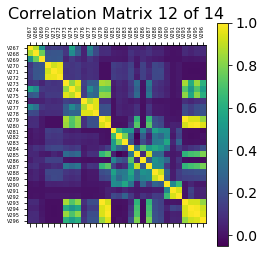

<Figure size 1368x1080 with 0 Axes>

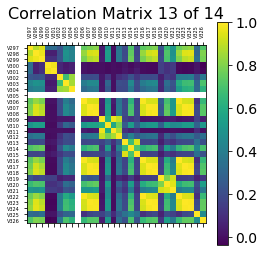

<Figure size 1368x1080 with 0 Axes>

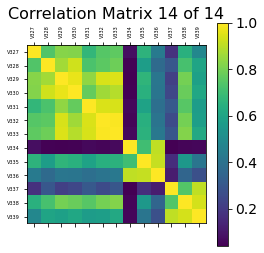

In [16]:
import matplotlib.pyplot as plt 
import math
#This Function will plot the correlation matrix for the data passed into it 
#This function will take two inputs correlation_data which is the data you want to find the correlation for and elements_per_matrix which is how many points you want to be displayed per matrix 
#There is no return value as the purpose is to plot the correlation matrix 
def CorrPlot(correlation_data,elements_per_matrix):
    corrmatrix=correlation_data.corr()#create a correlation matrix 
    #top_corr_features=corrmatrix.index#assign the column names from the data to the matirx
    elements=math.floor(correlation_data.shape[1]/elements_per_matrix)#Find the number of elements needed per matrix 
    ClearFiles('..\Plots\Correlation_matrixes')#Delete all of the files from the folder so new ones can be saved 
    fig=plt.figure()
    fig.suptitle('Correlation Matrixes')
    fname1="..\Plots\Correlation_matrixes\Full_Matrix.png"
    fig.savefig(fname1)
    for i in range(1,elements+1):#Go through all of the matrixes
        if (i==1):
            corrmat=corrmatrix.iloc[1:(i*elements_per_matrix),1:(i*elements_per_matrix)]#if the I is one start at one so there is not a zero to get the smaller matrix
        else: 
            corrmat=corrmatrix.iloc[(i-1)*elements_per_matrix:(i*elements_per_matrix),(i-1)*elements_per_matrix:(i*elements_per_matrix)]#Get the smaller matrix to plot
        
        ax=fig.add_subplot((elements/2),(elements/2),i)
        ax.matshow(corrmat)
        ax.set_xticks([])#plot the names of each varible on the x axis
        ax.set_yticks([])#plot the names of each variable on the Y axis
        f=plt.figure()
        plt.matshow(corrmat)#plot the matrix 
        plt.xticks(range(corrmat.shape[1]),corrmat.columns, fontsize=5, rotation=90)#plot the names of each varible on the x axis
        plt.yticks(range(corrmat.shape[1]), corrmat.columns, fontsize=5)#plot the names of each variable on the Y axis
        cb=plt.colorbar()#include a colour bar to show the levels of correlation 
        cb.ax.tick_params(labelsize=14)
        plt.title('Correlation Matrix {} of {}'.format(i,elements) ,fontsize=16)#Plot the titles with the current matrix and the full amount 
        fname="..\Plots\Correlation_matrixes\Corr_Matrix_{}.png".format(i)#create the file name to increment and save to the plots matrixes file 
        f.savefig(fname)#save the figure
  
#This function will clear all of the contents from a folder 
#it will take an input of the path to the folder 
#there is no input as it just deletes all files from a specific folder 
#####################################################################BE CAREFUL AS IT CAN DELETE A LOT OF FILES 
def ClearFiles(folder):
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))


CorrPlot(train_combined,30)#call the function with train_combined data and 30 features per matrix 

In [16]:
print("Correlation of variables to the isFraud variable sorted based on absolute value\n")
corr_sort=(corrmat['isFraud'].abs().sort_values(kind="quicksort",ascending=False))#sort the variables decending by their abolute value as some are negativly or positivly correlated
org=corrmat['isFraud']#create a column of just the isFroud correlations
col=[]#make two arrays to gather the sorted data
dat=[]
for t in range(corr_sort.size):#go though all of the data and assign the index to the index and the origional number from the unsorted array to keep the sign 
    col.append(corr_sort.index[t])
    dat.append(org[corr_sort.index[t]])

sorted_corr=pd.Series(dat,index=col)#create a new series with the index and numbers with the origional sign 
for m in range(sorted_corr.size):
    print('{:15s} {:15s}'.format(sorted_corr.index[m],str(sorted_corr[m])))#in order to print the whole thing we need a for loop to not have it concatinated

Correlation of variables to the isFraud variable sorted based on absolute value

isFraud         1.0            
V87             0.396016178894447
V45             0.39312089427049624
V86             0.3878639694954246
V257            0.383285614881806
V246            0.3671387615186573
V244            0.3646459529063118
V242            0.3611199357939747
V44             0.36058979725164486
V201            0.3280050345983333
V200            0.3187825140584292
V189            0.3082194603691625
V188            0.30358227133693705
V258            0.3010423200462906
V23             0.2921487173811754
V24             0.2787874952453313
V158            0.2775835243215157
V156            0.27541870314366423
V149            0.27273692823421086
V228            0.26896985024472025
V47             0.26155777758653315
V170            0.24979447724527593
V52             0.2490043074175615
V147            0.24196357378267405
V230            0.23441121278563937
V157            0.2343771114910733
V155